# 1.3. OVERFITTING AND UNDERFITTING
## INTRODUCTION
Machine learning is the process of creating models that can learn from data and make predictions or decisions. However, not all models are equally good at learning and generalizing to new data. Some models may suffer from overfitting or underfitting, which are two common problems that affect the performance and accuracy of machine learning algorithms.

## OVERFITTING
**Overfitting** occurs when a **model learns the training data too well and captures not only the underlying pattern but also the noise and random fluctuations in the data**. As a result, the model becomes too complex and specific to the training data and fails to generalize well to new and unseen data. In other words, the model performs well on the training data but poorly on the testing data.

An example of overfitting is when a model tries to fit a polynomial curve to a set of points that have a linear relationship. The polynomial curve may pass through all the points in the training data, but it will deviate significantly from the true linear relationship and make inaccurate predictions for new data points.

## UNDERFITTING
**Underfitting** occurs when a **model fails to learn the training data sufficiently and cannot capture the underlying trend of the data**. As a result, the model becomes too simple and generic and has low predictive power. In other words, the model performs poorly on both the training data and the testing data.

An example of underfitting is when a model tries to fit a linear line to a set of points that have a nonlinear relationship. The linear line may have a low error on the training data, but it will miss the true nonlinear relationship and make inaccurate predictions for new data points.

## DETECTION OF OVERFITTING AND UNDERFITTING
- One way to detect overfitting and underfitting is to **compare the performance metrics** (such as accuracy, precision, recall, etc.) of the model on both the training data and the testing data. If the model has a high performance on the training data but a low performance on the testing data, it is likely overfitted. If the model has a low performance on both the training data and the testing data, it is likely underfitted.
- Another way to detect overfitting and underfitting is to **use validation techniques**, such as cross-validation or hold-out validation, which split the data into multiple subsets and evaluate the model on different combinations of training and testing subsets. This helps to reduce the variance of the performance estimates and provide a more reliable measure of how well the model generalizes to new data.

## AVOIDING OVERFITTING AND UNDERFITTING
There are several methods to avoid or reduce overfitting and underfitting, depending on the type and complexity of the model, the size and quality of the data, and the learning algorithm. Some of these methods are:
- **Increasing or decreasing the model complexity**: A more **complex model (such as a deep neural network) may be able to capture more features and patterns in the data, but it may also be more prone to overfitting**. A less complex model (such as a linear regression) may be easier to interpret and generalize, but it may also be more prone to underfitting. Therefore, choosing an appropriate level of complexity for the model is crucial for achieving a good balance between bias and variance.
- **Regularization**: Regularization is a **technique that adds a penalty term to the loss function of the model, which reduces its complexity and prevents overfitting**. There are different types of regularization methods, such as L1 regularization (which adds the absolute value of the weights), L2 regularization (which adds the square of the weights), or dropout (which randomly drops out some units or connections in a neural network).
- **Feature engineering**: Feature engineering is a **technique that creates new features or transforms existing features from the raw data**, which enhances the quality and representation of the data and improves the performance of the model. For example, feature engineering can involve scaling, normalization, binning, encoding, or polynomial expansion of the features.

## HANDSON FOR HANDLING OVERFITTING AND UNDERFITTING

### BASIC IMPORTS

In [1]:
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error 
import numpy as np
from sklearn.model_selection import validation_curve 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
np.random.seed(0)
plt.style.use('ggplot')

### USING THE IRIS DATASET AS A REFERENCE

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

### K-FOLD CROSS-VALIDATION TO EVALUATE THE GENERALIZATION EFFICIENCY OF THE MODEL

In [3]:
kf = KFold(n_splits=20) 
list_training_error = [] 
list_testing_error = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    model = MLPRegressor() # We have used a multilayer perceptron (MLP) regressor model. A MLP is c 
    model.fit(X_train, y_train)
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred)
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

### USING MAE (Mean Absolute Error) TO TRACK TRAINING AND TESTING ERRORS

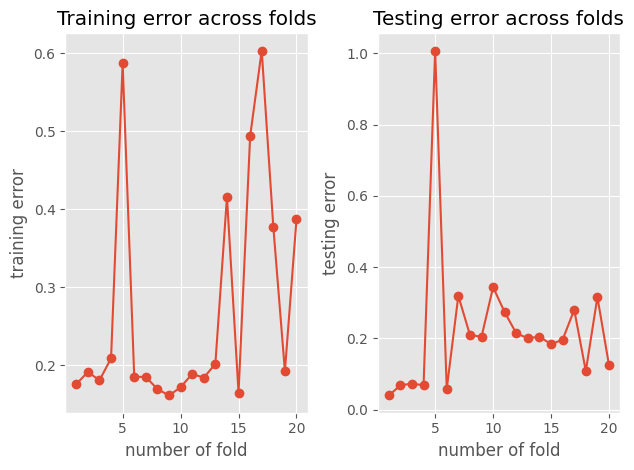

In [4]:
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-') 
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-') 
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

## REFERENCES
1. https://365datascience.com/tutorials/machine-learning-tutorials/overfitting-underfitting/
2. https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
3. https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/
4. https://www.simplilearn.com/tutorials/machine-learning-tutorial/overfitting-and-underfitting